## Spam email identification


Hey Everyone!!
We hope that you are excited to apply your newly acquired knowledge and test it on this notebook.
In this assignment, we will be walking through creating an email classifier based the content the mail has.

## About the data

The data "email.csv" has a few rows and about 3K columns including <b>Email_no.</b> and <b>Prediction</b>. <br>
Email_no. is like a unique id for an email and spam denotes whether the given mail is a spam or not (0 = not spam, 1 = spam)<br>
Rest of the columns are words in english with the values being equal to the frequency of that word in the email.
<br>Our goal is to predict whether the given mail is spam or not

## Importing useful libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.svm import SVC
import seaborn as sns
from sklearn.linear_model import Lasso, Ridge
import pickle

## Loading the data
### If you are using Datalore, you may use the csv file directly. Otherwise you may download it from <a href = "https://drive.google.com/file/d/1OxJ6SSuPypg-AfLbMRl0O9So9aDDNzbC/view?usp=sharing">this link</a>

In [4]:
df = pd.read_csv('emails.csv')

## Describe the data and generate some basic insights unsing methods like .info

In [5]:
df.head()
# df.shape

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [6]:
df.Prediction.value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

## Looking at the data

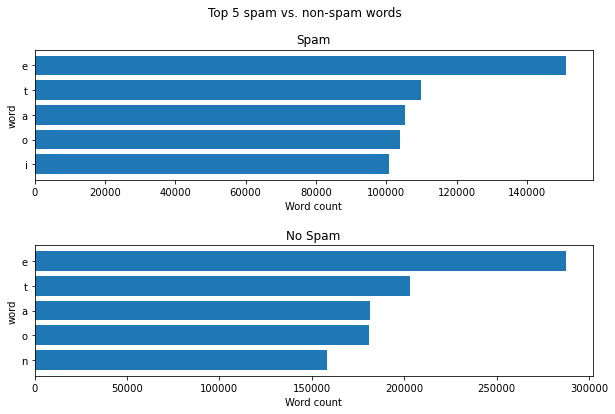

<Figure size 432x288 with 0 Axes>

In [7]:
# Plot histogram to visualize the top 5 common words in spam mail and non-spam mails seperately.
g = [i for i in df.columns if len(i)<0]

spam = df[df.Prediction == 1].sum().drop("Email No.", axis=0).sort_values()
no_spam = df[df.Prediction == 0].sum().drop("Email No.", axis=0).sort_values()

spam = spam.drop(index=g)
no_spam = no_spam.drop(index=g)

fig, axis = plt.subplots(2, figsize=(10,6))
fig.suptitle("Top 5 spam vs. non-spam words")

axis[0].barh(spam.tail().index, width=spam.tail().values)
axis[0].set_title("Spam")
axis[0].set_xlabel("Word count")
axis[0].set_ylabel("word")

plt.subplots_adjust(hspace=0.5)

axis[1].barh(no_spam.tail().index, width= no_spam.tail().values)
axis[1].set_title("No Spam")
axis[1].set_xlabel("Word count")
axis[1].set_ylabel("word")

plt.show()
plt.savefig('Plot_of_spam_vs_non-spam_words.png')

## Figuring out some comparatively more important features

In [11]:
X = df.drop(["Email No.", "Prediction"], axis=1)
y = df.Prediction

In [12]:
ridge = Ridge(alpha=0.0001)  # alpha controls the strength of regularization
ridge.fit(X, y)
ridge_coefs = ridge.coef_
ridge_selected_features = X.columns[np.abs(ridge_coefs) > 0.081]

In [13]:
# There are 3K rows given in this dataset, can you think of some method to reduce the number of columns in the dataset?
importances = ridge_selected_features
# Put importances into a Series
feat_imp = pd.Series(importances)

# Try taking only top 1.5K that will comprise of some of the most "deciding factors
g = [i for i in X.columns if not i in feat_imp.head(1500).values]
clean = df.drop(columns = g)

## Train - Test Split

In [14]:
X = clean.drop(columns=["Email No.", "Prediction"])
y = clean["Prediction"]
# Create trianing and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4137, 1500)
y_train shape: (4137,)
X_test shape: (1035, 1500)
y_test shape: (1035,)


## Making Predictions using Multinomial NB Classifier

In [15]:
# Feed the train data into multinomial naive bias classifier
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [16]:
with open('model_MultinomialNB.pkl', 'wb') as file:
    pickle.dump(model, file)

Accuracy: 0.9400966183574879


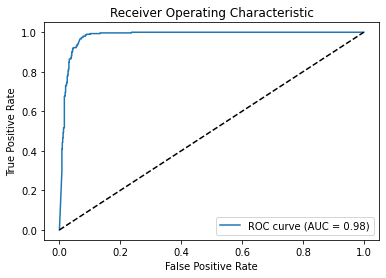

<Figure size 432x288 with 0 Axes>

In [17]:
# Check the model's accuracy of test data and plot the ROC-AUC curve
y_pred1 = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)
y_pred_prob1 = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob1[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_prob1[:, 1])
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
plt.savefig('Receiver_Operating_Characteristic.png')

## Plot the confusion Matrix

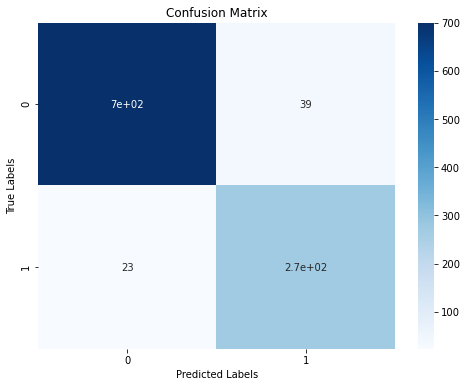

<Figure size 432x288 with 0 Axes>

In [22]:
# Print Confusion Matrix using any 5 words of your choice with the column 'spam'
cm = confusion_matrix(y_test, y_pred1)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
plt.savefig('confusion_Matrix_with_NB.png')

## Trying out with SVMs

Accuracy: 0.9169082125603865


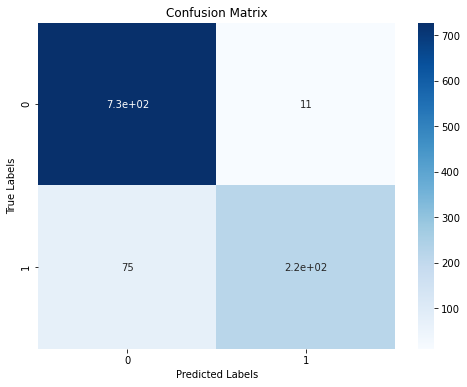

<Figure size 432x288 with 0 Axes>

In [21]:
# Apply similar processes as above through SVC i.e., Make prediction, check accuacy and plot confusion matrix
# Try using Support Vector Classifier (SVC) from scikit-learn
classifier = SVC()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

with open('model_SVM.pkl', 'wb') as file:
    pickle.dump(classifier, file)
    
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
plt.savefig("confusion_matrix_with_svm.png")


## Comparing the models

##### Which model performed better?
Multinomial NB Classifier peroforms better than SVMs
##### Can you suggest some reason for better performance of one model over the other?
The performance of any machine learning model heavily relies on the quality and representativeness of the training data. If the training data for the Multinomial NB classifier contains a wide range of diverse and representative spam and legitimate emails, it is more likely to generalize well to new, unseen examples. Additionally, if the training data is labeled accurately, without misclassifications or errors, it can significantly enhance the performance of the model. Therefore, it's crucial to ensure the training data is of high quality and represents the real-world distribution of spam emails.

## Bonus Question

In [ ]:
# Given a string. Try to create the dataset having each word of dataset as column and row values as the frequency of that word.
# For example
# s = "I am a Python developer and currently working on a project to classify mails"
# dataframe = {"I" : 1,
#              "am" :1,
#              "a" : 2,
#               ...}